In [ ]:
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [ ]:
#create dataframe
crcd_df = pd.read_csv('card_transdata.csv')
crcd_df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [ ]:
crcd_df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
crcd_df.shape

(1000000, 8)

In [ ]:
crcd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [ ]:
#checking how balanced target column is

crcd_df['fraud'].value_counts()

0.0    912597
1.0     87403
Name: fraud, dtype: int64

In [ ]:
#checking for null values

crcd_df.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

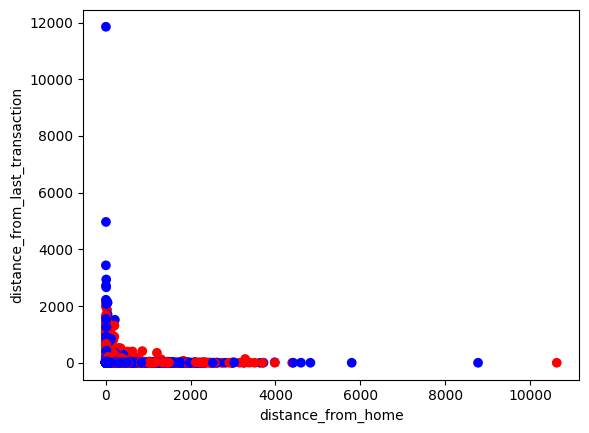

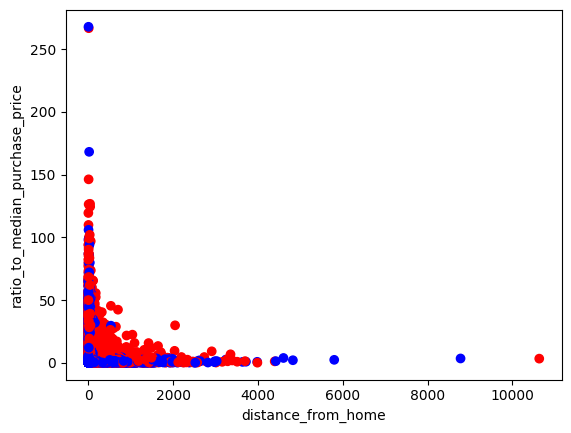

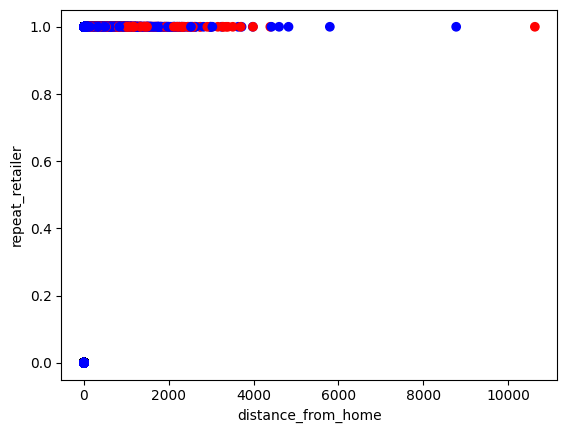

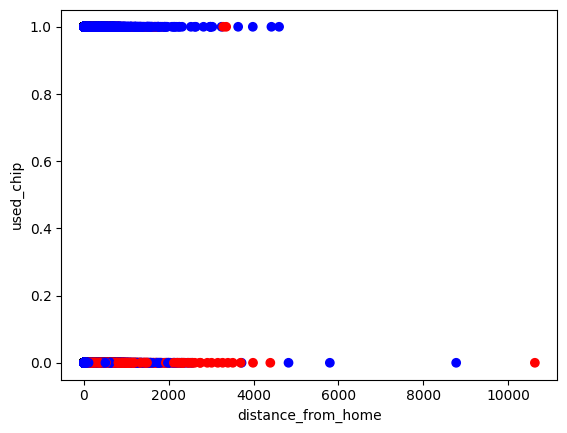

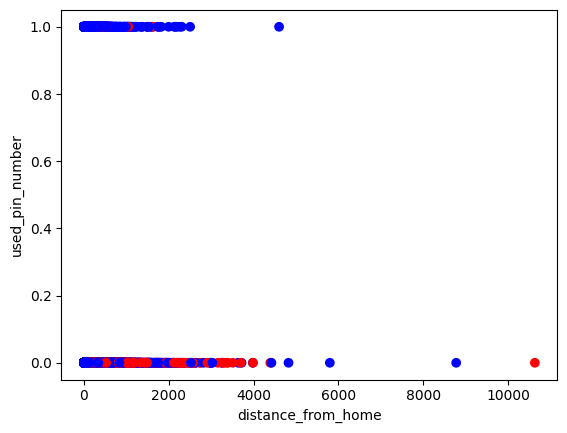

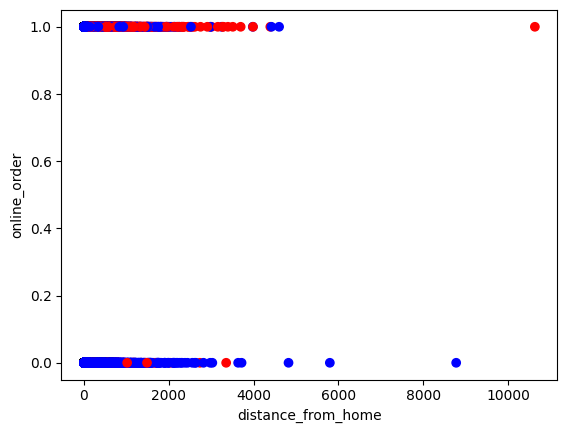

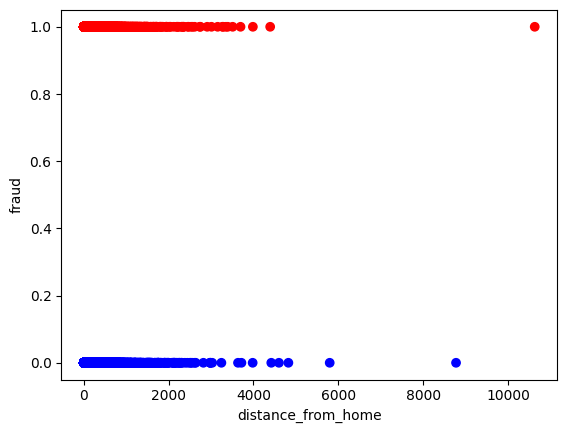

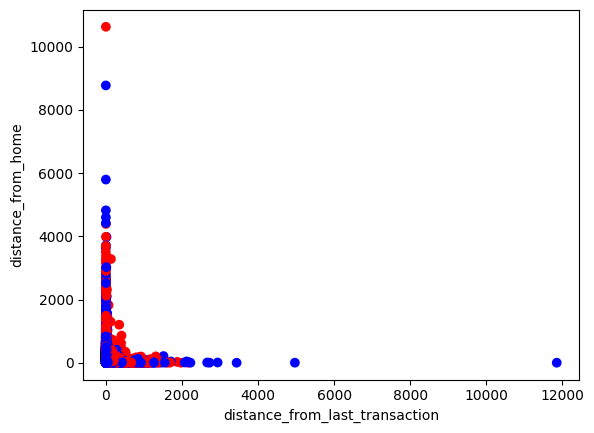

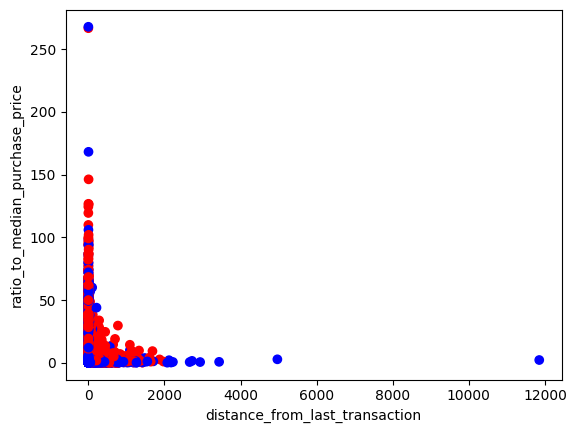

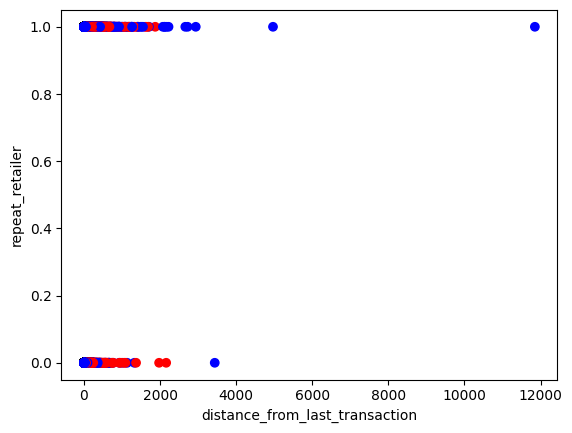

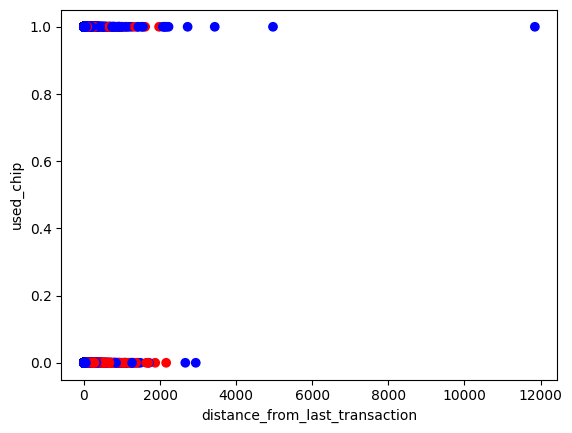

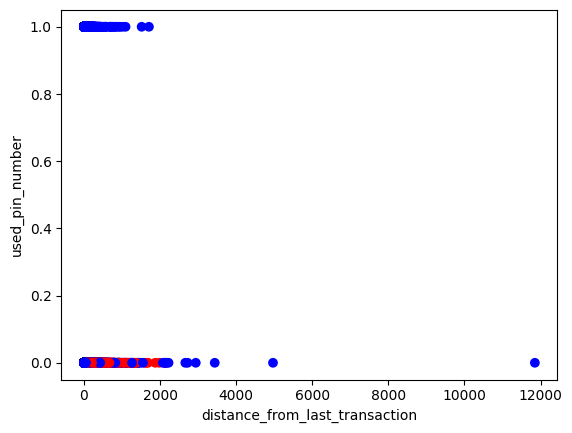

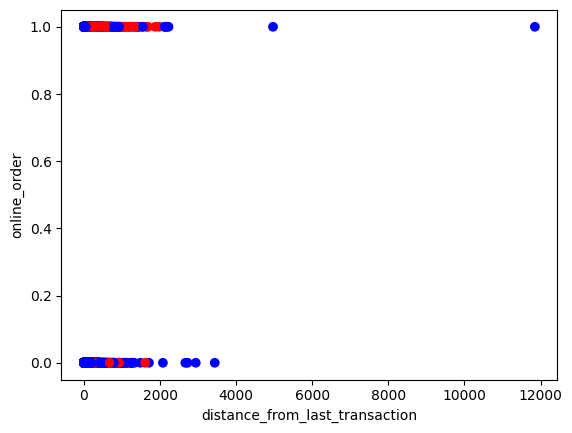

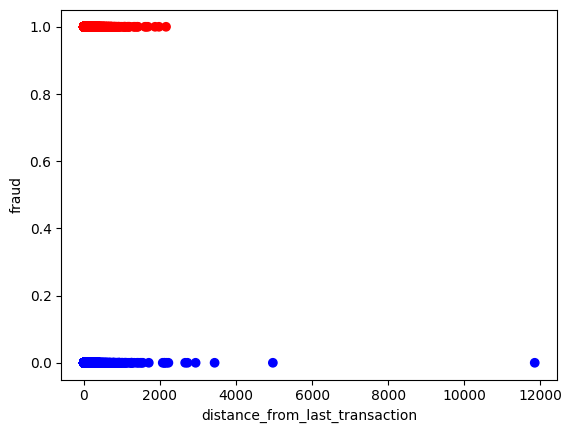

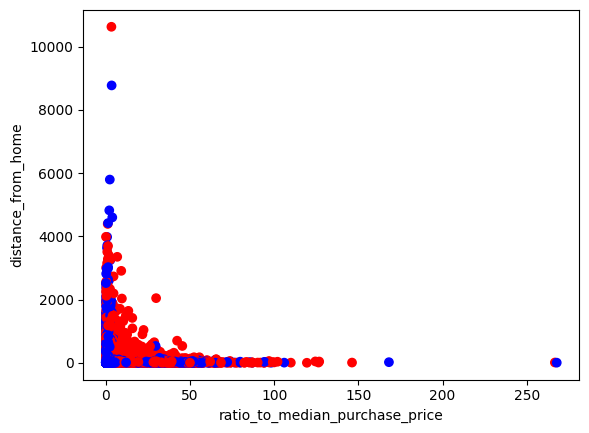

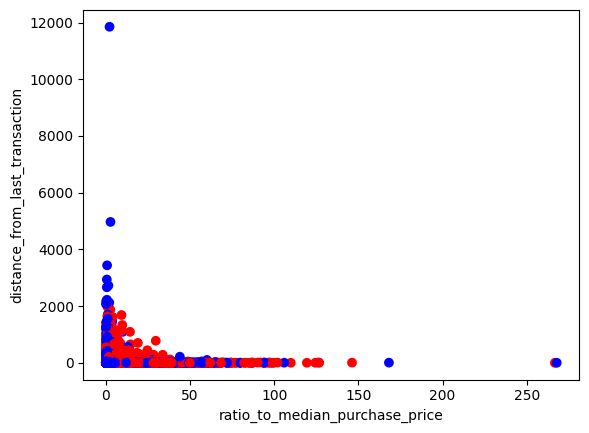

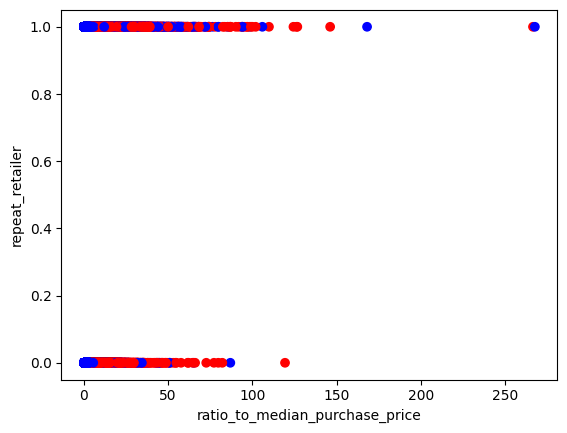

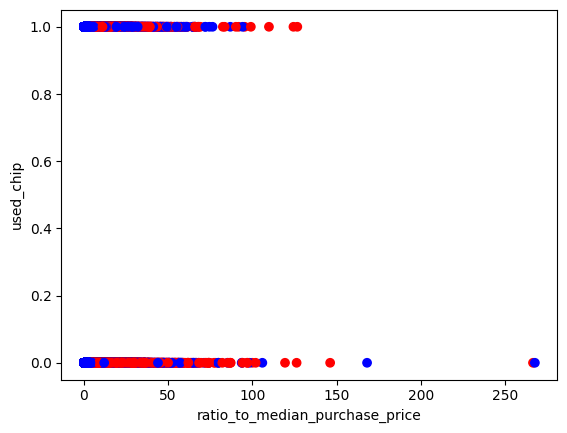

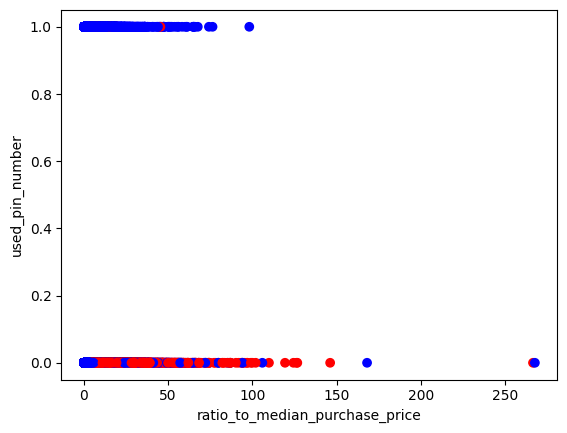

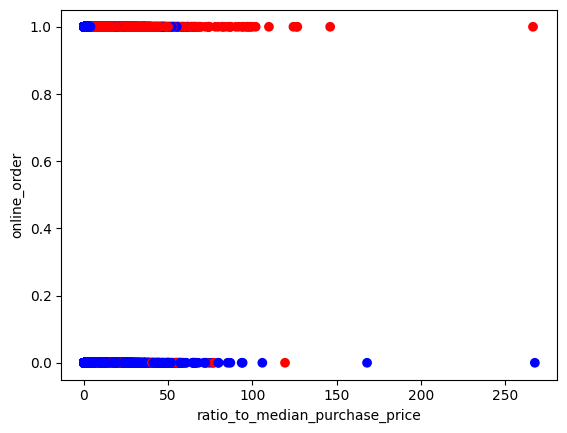

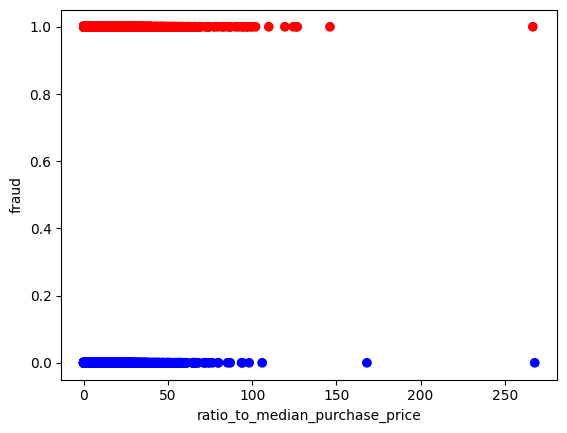

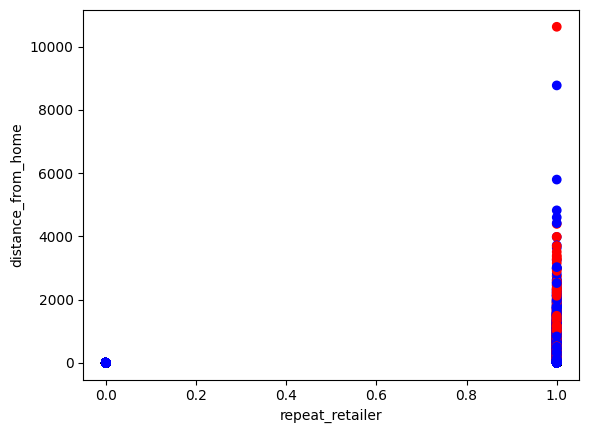

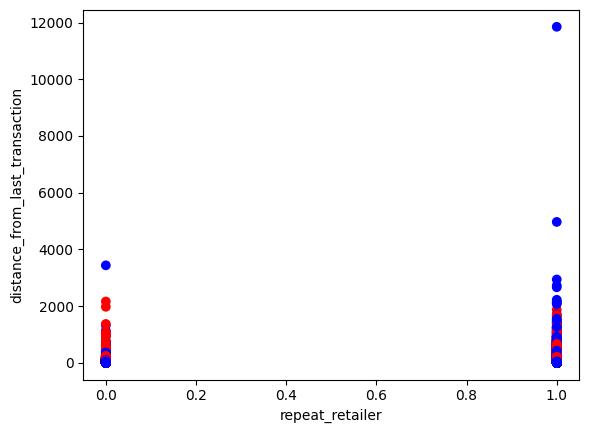

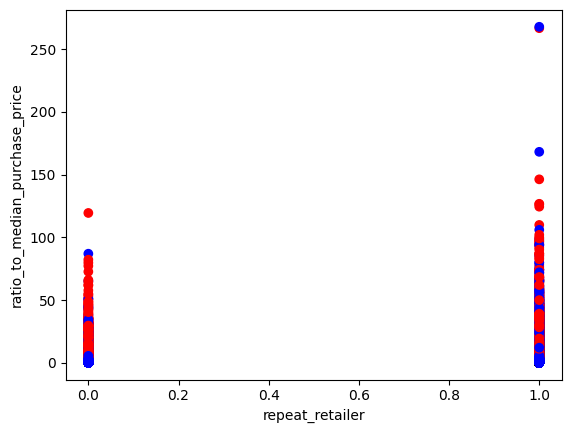

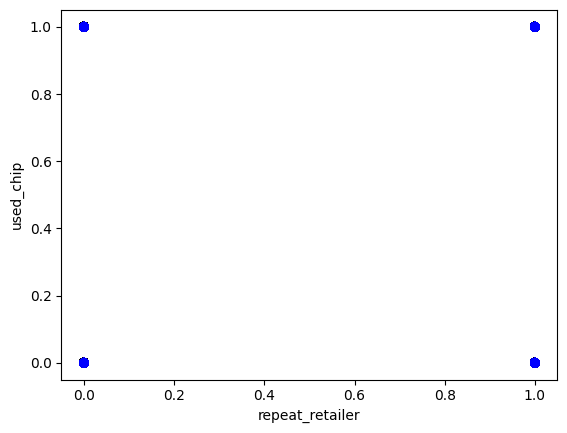

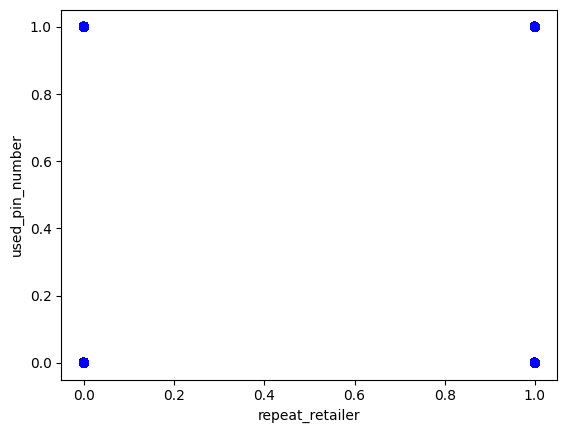

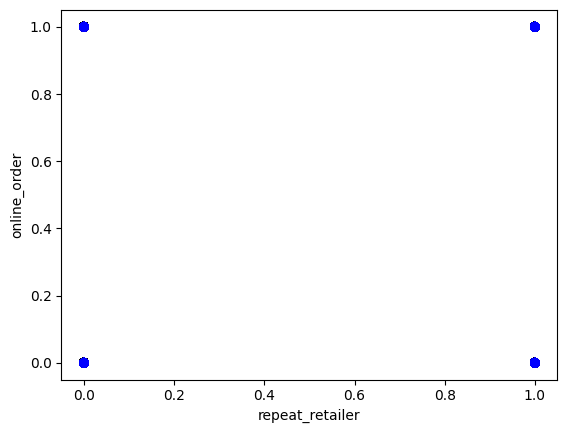

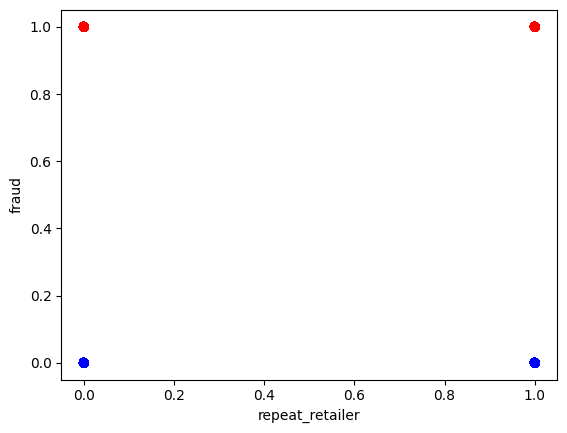

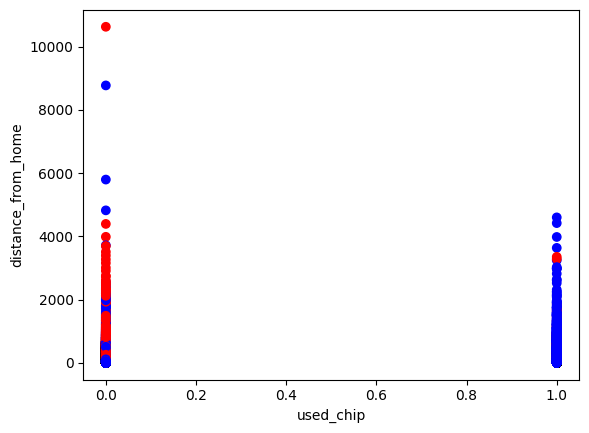

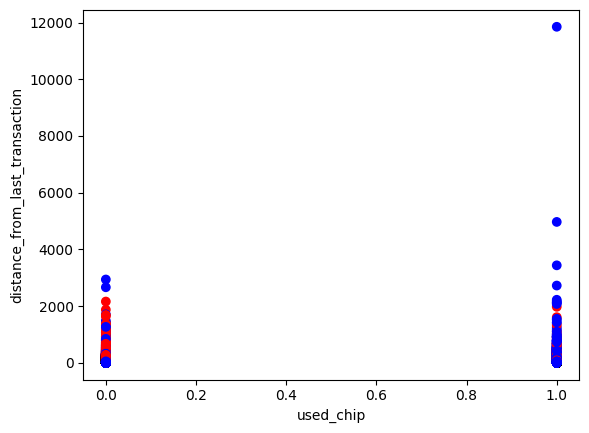

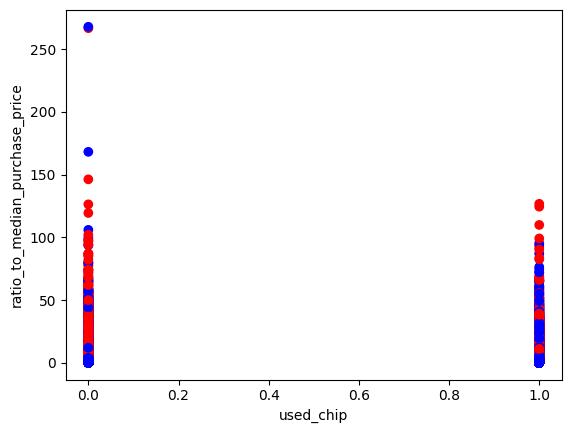

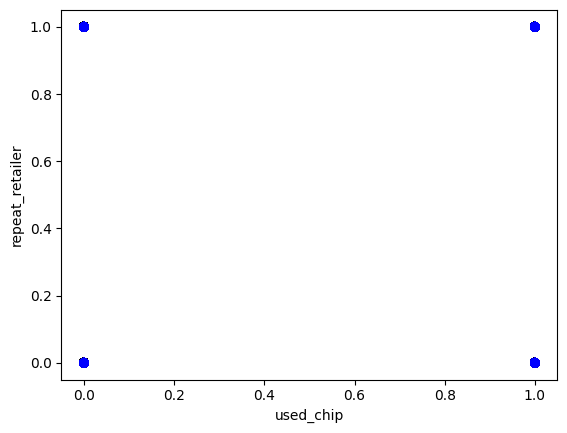

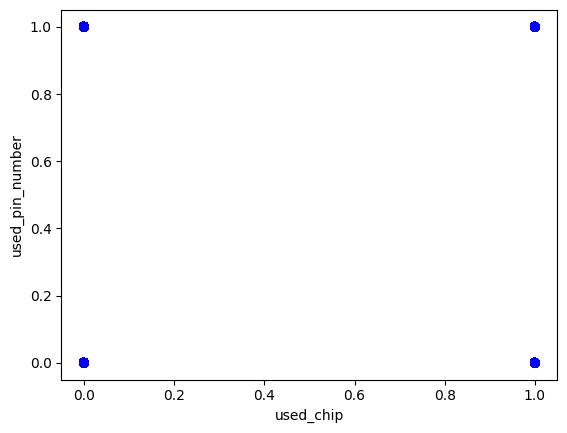

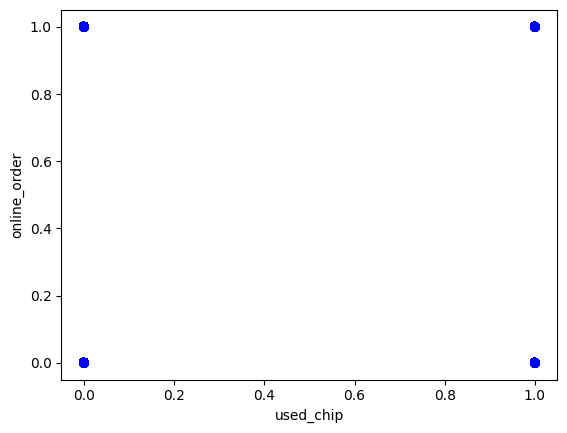

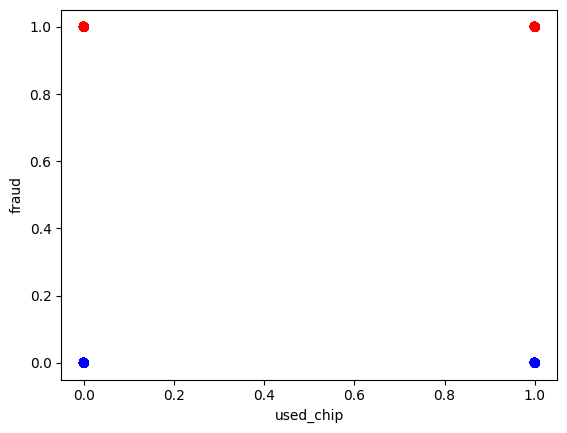

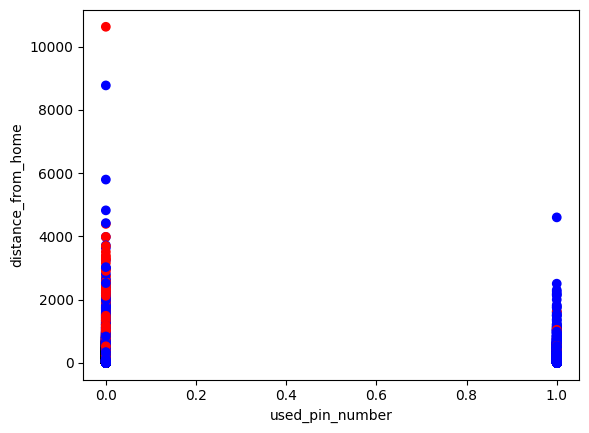

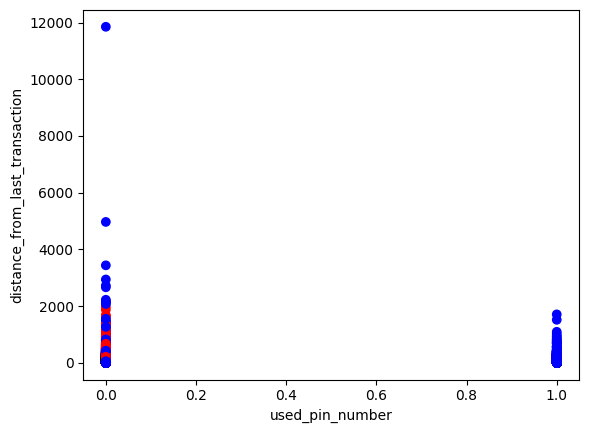

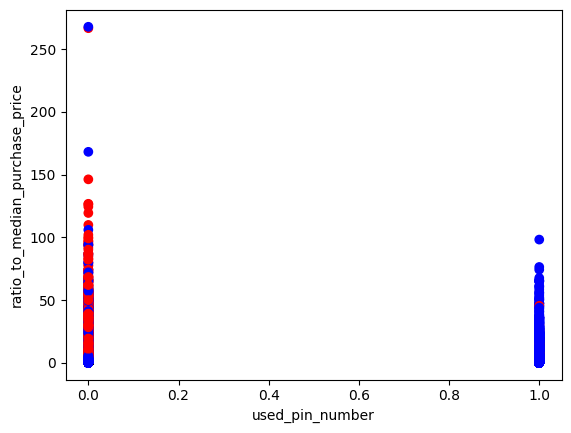

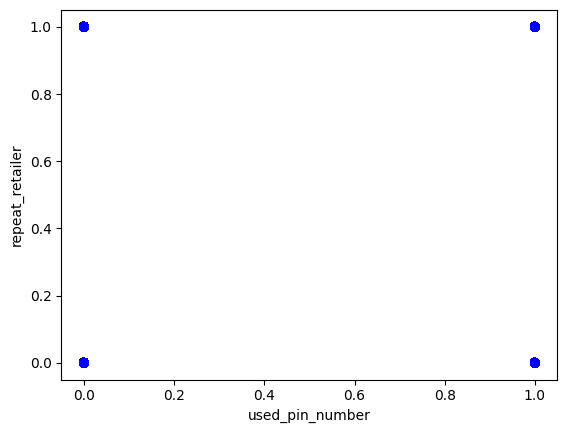

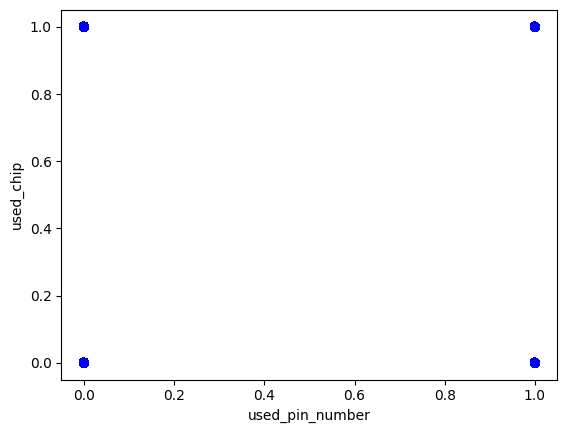

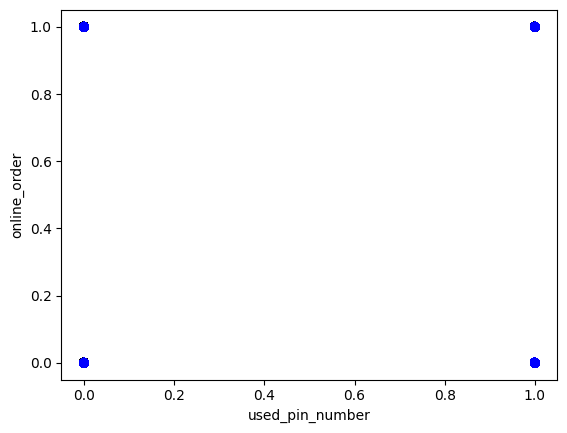

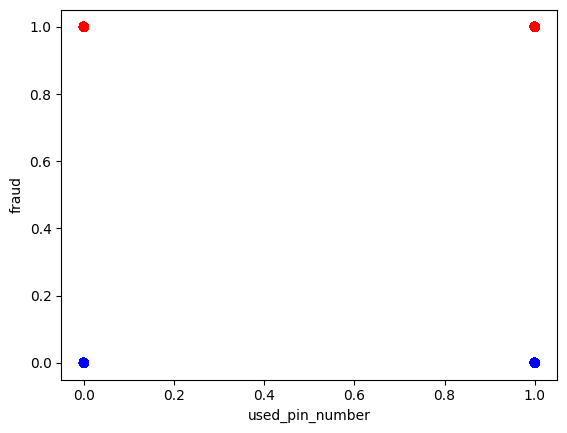

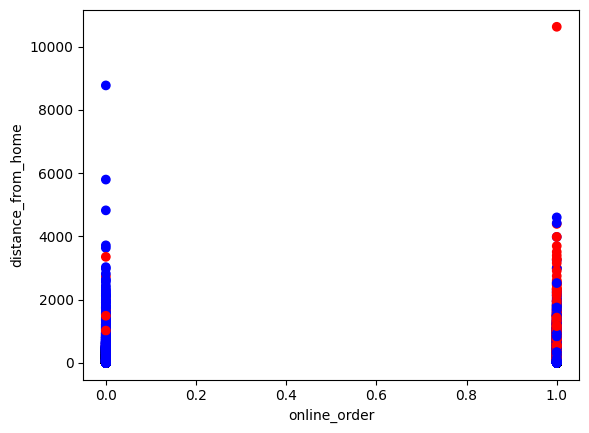

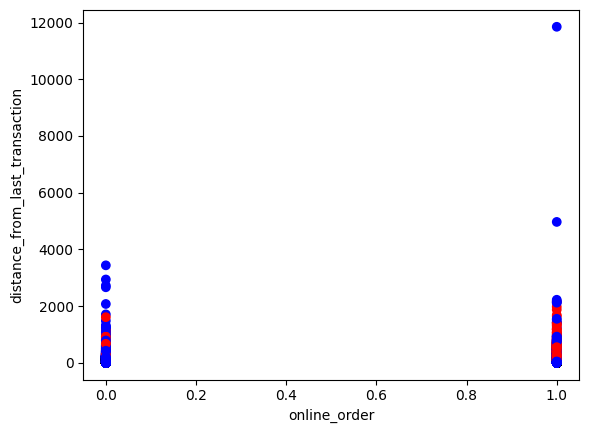

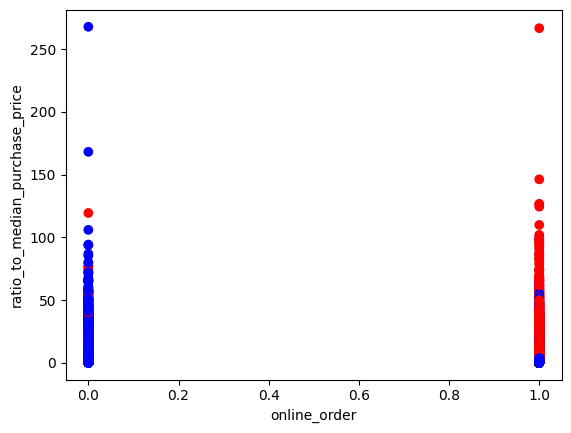

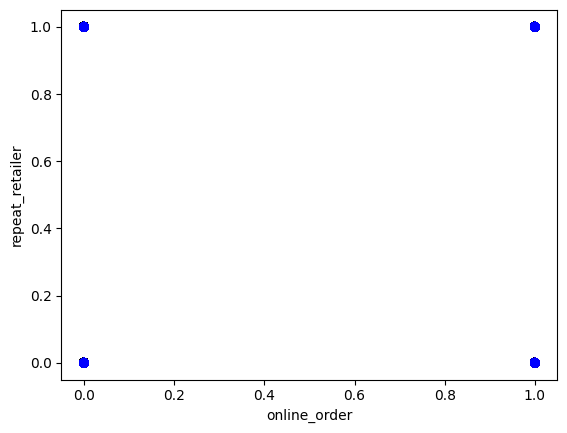

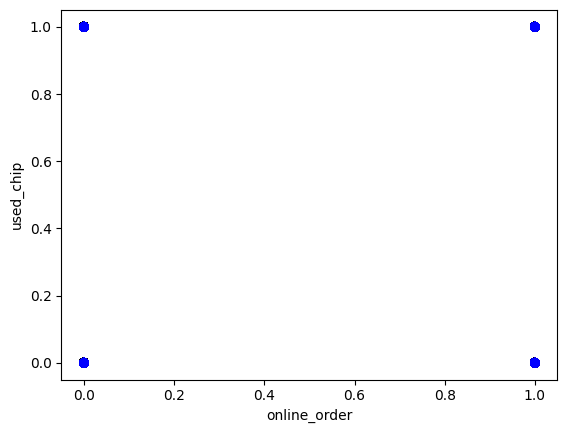

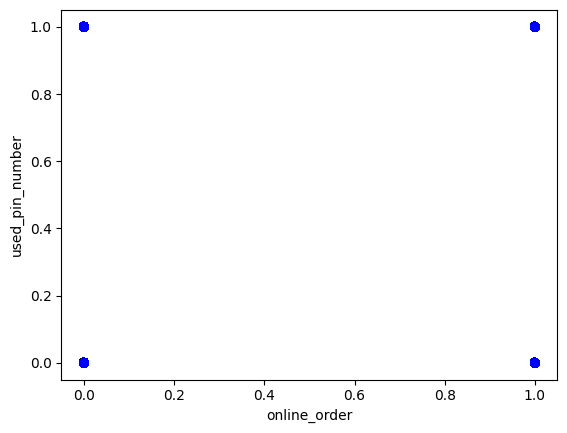

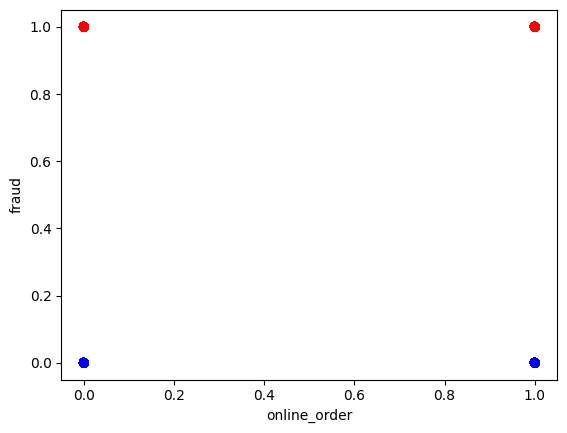

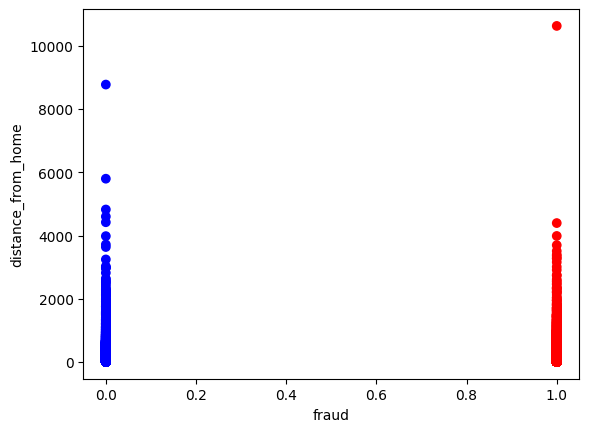

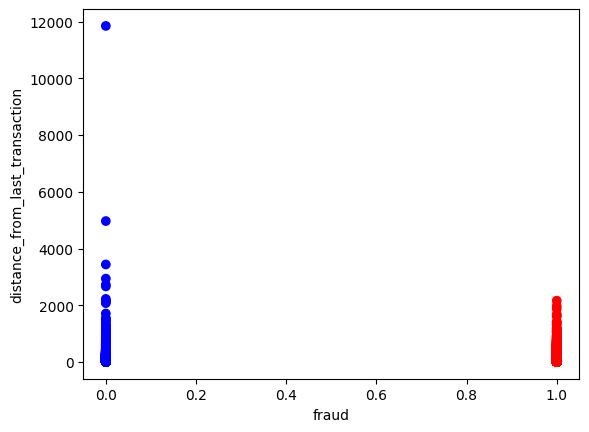

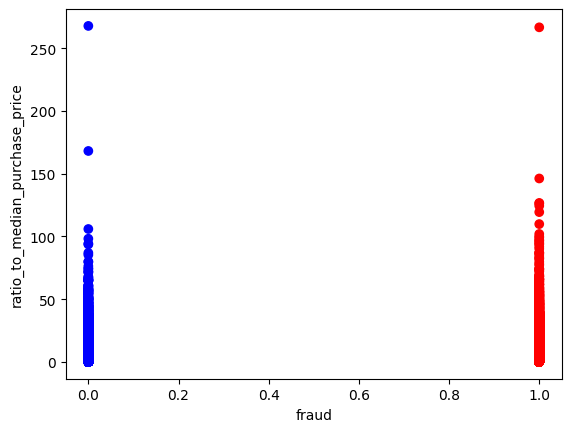

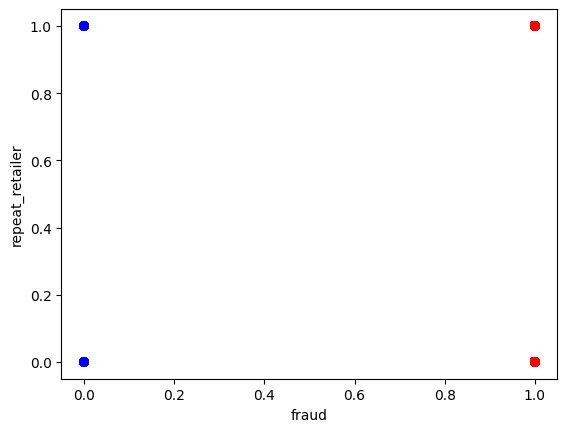

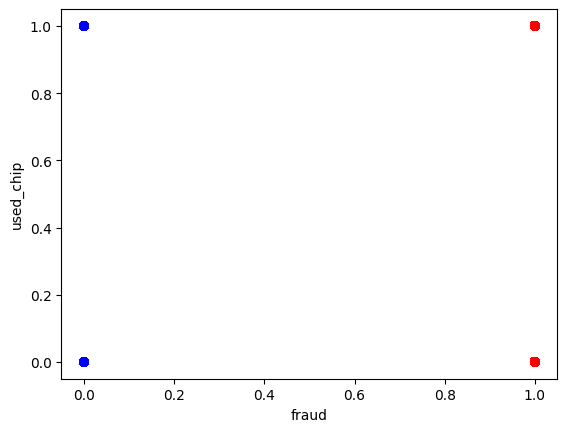

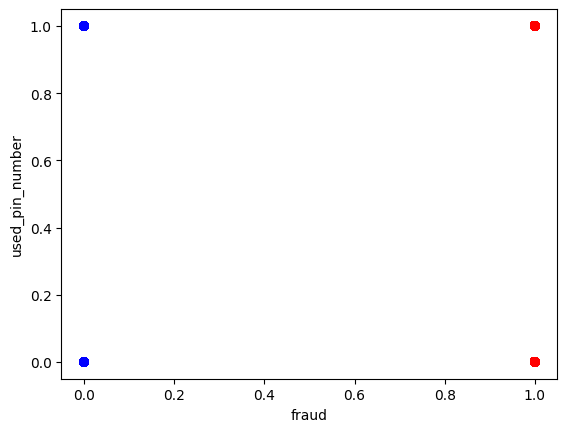

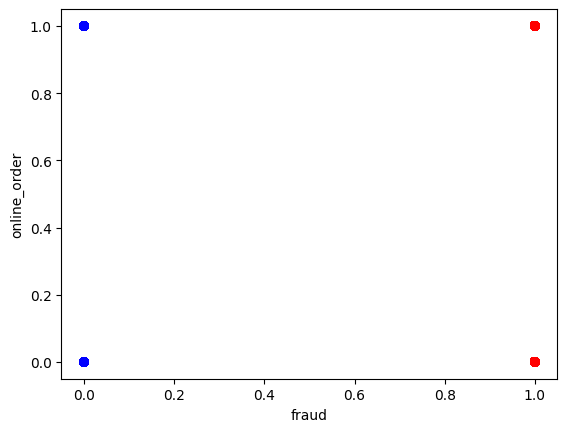

In [ ]:
#create some visuals of data --> plot numerical features against eachother and color code target

markers = {0.0 : 'b', 1.0 : 'r'}   # not fraud = blue, fraud = red
markers_values = [markers[i] for i in crcd_df['fraud']]

for i in crcd_df.columns:
    for j in crcd_df.columns:
        if (i != j):
            fig, ax = plt.subplots() #get axis object
            ax.scatter(crcd_df[i], crcd_df[j], c = markers_values)
            ax.set_xlabel(i)
            ax.set_ylabel(j)
            plt.show()

In [ ]:
#Create test subsets

subset1 = crcd_df[["distance_from_home", "distance_from_last_transaction", "fraud"]].copy()
subset2 = crcd_df[["distance_from_home", "ratio_to_median_purchase_price", "fraud"]].copy()
subset3 = crcd_df[["distance_from_last_transaction", "ratio_to_median_purchase_price", "fraud"]].copy()
subset4 = crcd_df[["distance_from_home", "distance_from_last_transaction", "ratio_to_median_purchase_price", "fraud"]].copy()

In [ ]:
#set up log. reg
log_reg = LogisticRegression()

In [ ]:
#set up LinearSVC

cw = {0.0:912597, 1.0:87403}
model = LinearSVC(loss='hinge')

In [ ]:
#subset 1 --> split into train & test

X1 = subset1.drop('fraud', axis = 1)
y1 = subset1['fraud']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.3, random_state = 0, stratify = y1)

In [ ]:
#subset 1 --> linearSVC

model.fit(X1_train, y1_train)

s1_train_pred = model.predict(X1_train)
s1_test_pred = model.predict(X1_test)

In [ ]:
s1_train_acc = accuracy_score(y1_train, s1_train_pred) * 100
s1_test_acc = accuracy_score(y1_test, s1_test_pred) * 100

print(f"Training Accuracy Using LinearSVC: {s1_train_acc}%")
print(f"Testing Accuracy Using LinearSVC: {s1_test_acc}%")

Training Accuracy Using LinearSVC: 91.2597142857143%
Testing Accuracy Using LinearSVC: 91.25966666666666%


In [ ]:
s1_F1_train = f1_score(y1_train, s1_train_pred)
s1_F1_test = f1_score(y1_test, s1_test_pred)

print(f"Training F1 Score Using LinearSVC: {s1_F1_train}")
print(f"Testing F1 Score Using LinearSVC: {s1_F1_test}")

Training F1 Score Using LinearSVC: 0.0
Testing F1 Score Using LinearSVC: 0.0


In [ ]:
#set upp KNN for subset #1
mf11_dict = {}
k_val = [3, 5, 7, 9, 11]
for k in k_val:
  knn = KNeighborsClassifier(n_neighbors=k)         #can experiment w/ diff values of k
  knn.fit(X1_train,y1_train)
  y1_pred = knn.predict(X1_test)
  mf1 = f1_score(y1_test, y1_pred)
  mf11_dict[mf1] = k

k1_max = mf11_dict[max(mf11_dict)]
print(f"k value w/ minimum error: {k1_max}, with F1 score: {max(mf11_dict)}")

k value w/ minimum error: 3, with F1 score: 0.20740899128668416


In [ ]:
kn1 = KNeighborsClassifier(n_neighbors=k1_max)
kn1.fit(X1_train, y1_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
knn1_train_pred = kn1.predict(X1_train)
knn1_test_pred = kn1.predict(X1_test)

In [ ]:
knn1_train_acc = accuracy_score(y1_train, knn1_train_pred) * 100
knn1_test_acc = accuracy_score(y1_test, knn1_test_pred) * 100

print(f"Training Accuracy Using KNN: {knn1_train_acc}%")
print(f"Testing Accuracy Using KNN: {knn1_test_acc}%")

Training Accuracy Using KNN: 92.945%
Testing Accuracy Using KNN: 90.11533333333334%


In [ ]:
knn1_F1_train = f1_score(y1_train, knn1_train_pred)
knn1_F1_test = f1_score(y1_test, knn1_test_pred)

print(f"Training F1 Score Using KNN: {knn1_F1_train}")
print(f"Testing F1 Score Using KNN: {knn1_F1_test}")

Training F1 Score Using KNN: 0.4369834121871971
Testing F1 Score Using KNN: 0.20740899128668416


In [ ]:
#subset 1 --> log. reg.

log_reg.fit(X1_train, y1_train)

lr1_train_pred = log_reg.predict(X1_train)
lr1_test_pred = log_reg.predict(X1_test)

In [ ]:
lr1_train_acc = accuracy_score(y1_train, lr1_train_pred) * 100
lr1_test_acc = accuracy_score(y1_test, lr1_test_pred) * 100

print(f"Training Accuracy Using Log. Reg.: {lr1_train_acc}%")
print(f"Testing Accuracy Using Log. Reg.: {lr1_test_acc}%")

Training Accuracy Using Log. Reg.: 91.19314285714286%
Testing Accuracy Using Log. Reg.: 91.19933333333333%


In [ ]:
lr1_F1_train = f1_score(y1_train, lr1_train_pred)
lr1_F1_test = f1_score(y1_test, lr1_test_pred)

print(f"Training F1 Score Using Log. Reg.: {lr1_F1_train}")
print(f"Testing F1 Score Using Log. Reg.: {lr1_F1_test}")

Training F1 Score Using Log. Reg.: 0.06233078818483254
Testing F1 Score Using Log. Reg.: 0.06508498583569405


In [ ]:
#subset 2 --> split into train & test

X2 = subset2.drop('fraud', axis = 1)
y2 = subset2['fraud']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.3, random_state = 0, stratify = y2)


In [ ]:
#subset 2 --> linearSVC

model.fit(X2_train, y2_train)

s2_train_pred = model.predict(X2_train)
s2_test_pred = model.predict(X2_test)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
s2_train_acc = accuracy_score(y2_train, s2_train_pred) * 100
s2_test_acc = accuracy_score(y2_test, s2_test_pred) * 100

print(f"Training Accuracy Using LinearSVC: {s2_train_acc}%")
print(f"Testing Accuracy Using LinearSVC: {s2_test_acc}%")

Training Accuracy Using LinearSVC: 91.74314285714286%
Testing Accuracy Using LinearSVC: 91.78166666666667%


In [ ]:
s2_F1_train = f1_score(y2_train, s2_train_pred)
s2_F1_test = f1_score(y2_test, s2_test_pred)

print(f"Training F1 Score Using LinearSVC: {s2_F1_train}")
print(f"Testing F1 Score Using LinearSVC: {s2_F1_test}")

Training F1 Score Using LinearSVC: 0.3984513228284174
Testing F1 Score Using LinearSVC: 0.40283866592389855


In [ ]:
#set upp KNN for subset #2
mf12_dict = {}
k_val = [3, 5, 7, 9, 11]
for k in k_val:
  knn = KNeighborsClassifier(n_neighbors=k)         #can experiment w/ diff values of k
  knn.fit(X2_train,y2_train)
  y2_pred = knn.predict(X2_test)
  mf1 = f1_score(y2_test, y2_pred)
  mf12_dict[mf1] = k

k2_max = mf12_dict[max(mf12_dict)]
print(f"k value w/ minimum error: {k2_max}, with F1 score: {max(mf12_dict)}")

k value w/ minimum error: 11, with F1 score: 0.6142478211443729


In [ ]:
kn2 = KNeighborsClassifier(n_neighbors=k2_max)
kn2.fit(X2_train, y2_train)

KNeighborsClassifier(n_neighbors=11)

In [ ]:
knn2_train_pred = kn2.predict(X2_train)
knn2_test_pred = kn2.predict(X2_test)

In [ ]:
knn2_train_acc = accuracy_score(y2_train, knn2_train_pred) * 100
knn2_test_acc = accuracy_score(y2_test, knn2_test_pred) * 100

print(f"Training Accuracy Using KNN: {knn2_train_acc}%")
print(f"Testing Accuracy Using KNN: {knn2_test_acc}%")

Training Accuracy Using KNN: 94.57328571428572%
Testing Accuracy Using KNN: 93.21333333333334%


In [ ]:
knn2_F1_train = f1_score(y2_train, knn2_train_pred)
knn2_F1_test = f1_score(y2_test, knn2_test_pred)

print(f"Training F1 Score Using KNN: {knn2_F1_train}")
print(f"Testing F1 Score Using KNN: {knn2_F1_test}")

Training F1 Score Using KNN: 0.6930616268452906
Testing F1 Score Using KNN: 0.6142478211443729


In [ ]:
#subset 2 --> log. reg.

log_reg.fit(X2_train, y2_train)

lr2_train_pred = log_reg.predict(X2_train)
lr2_test_pred = log_reg.predict(X2_test)

Training Accuracy Using Log. Reg.: 92.12757142857143%
Testing Accuracy Using Log. Reg.: 92.144%
Training Error Using Log. Reg.: 0.07872428571428572
Testing Error Using Log. Reg.: 0.07856


In [ ]:
lr2_train_acc = accuracy_score(y2_train, lr2_train_pred) * 100
lr2_test_acc = accuracy_score(y2_test, lr2_test_pred) * 100

print(f"Training Accuracy Using Log. Reg.: {lr2_train_acc}%")
print(f"Testing Accuracy Using Log. Reg.: {lr2_test_acc}%")

In [ ]:
lr2_F1_train = f1_score(y2_train, lr2_train_pred)
lr2_F1_test = f1_score(y2_test, lr2_test_pred)

print(f"Training F1 Score Using Log. Reg.: {lr2_F1_train}")
print(f"Testing F1 Score Using Log. Reg.: {lr2_F1_test}")

Training F1 Score Using Log. Reg.: 0.3688857839825006
Testing F1 Score Using Log. Reg.: 0.37141942710833736


In [ ]:
#subset 3 --> split into train & test

X3 = subset3.drop('fraud', axis = 1)
y3 = subset3['fraud']
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size = 0.3, random_state = 0, stratify = y3)

In [ ]:
#subset 3 --> linearSVC

model.fit(X3_train, y3_train)

s3_train_pred = model.predict(X3_train)
s3_test_pred = model.predict(X3_test)

In [ ]:
s3_train_acc = accuracy_score(y3_train, s3_train_pred) * 100
s3_test_acc = accuracy_score(y3_test, s3_test_pred) * 100

print(f"Training Accuracy Using LinearSVC: {s3_train_acc}%")
print(f"Testing Accuracy Using LinearSVC: {s3_test_acc}%")

Training Accuracy Using LinearSVC: 91.7372857142857%
Testing Accuracy Using LinearSVC: 91.74466666666666%


In [ ]:
s3_F1_train = f1_score(y3_train, s3_train_pred)
s3_F1_test = f1_score(y3_test, s3_test_pred)

print(f"Training F1 Score Using LinearSVC: {s3_F1_train}")
print(f"Testing F1 Score Using LinearSVC: {s3_F1_test}")

Training F1 Score Using LinearSVC: 0.22048814674052208
Testing F1 Score Using LinearSVC: 0.2202632076065739


In [ ]:
#set upp KNN for subset #3
mf13_dict = {}
k_val = [3, 5, 7, 9, 11]
for k in k_val:
  knn = KNeighborsClassifier(n_neighbors=k)         #can experiment w/ diff values of k
  knn.fit(X3_train,y3_train)
  y3_pred = knn.predict(X3_test)
  mf1 = f1_score(y3_test, y3_pred)
  mf13_dict[mf1] = k

k3_max = mf13_dict[max(mf13_dict)]
print(f"k value w/ minimum error: {k3_max}, with f1_score: {max(mf13_dict)}")

k value w/ minimum error: 11, with f1_score: 0.6205641143557905


In [ ]:
kn3 = KNeighborsClassifier(n_neighbors=k3_max)
kn3.fit(X3_train, y3_train)

KNeighborsClassifier(n_neighbors=11)

In [ ]:
knn3_train_pred = kn3.predict(X3_train)
knn3_test_pred = kn3.predict(X3_test)

In [ ]:
knn3_train_acc = accuracy_score(y3_train, knn3_train_pred) * 100
knn3_test_acc = accuracy_score(y3_test, knn3_test_pred) * 100

print(f"Training Accuracy Using KNN: {knn3_train_acc}%")
print(f"Testing Accuracy Using KNN: {knn3_test_acc}%")

Training Accuracy Using KNN: 94.35014285714286%
Testing Accuracy Using KNN: 93.39933333333333%


In [ ]:
knn3_F1_train = f1_score(y3_train, knn3_train_pred)
knn3_F1_test = f1_score(y3_test, knn3_test_pred)

print(f"Training F1 Score Using KNN: {knn3_F1_train}")
print(f"Testing F1 Score Using KNN: {knn3_F1_test}")

Training F1 Score Using KNN: 0.6755220084505887
Testing F1 Score Using KNN: 0.6205641143557905


In [ ]:
#subset 3 --> log. reg.

log_reg.fit(X3_train, y3_train)

lr3_train_pred = log_reg.predict(X3_train)
lr3_test_pred = log_reg.predict(X3_test)

Training Accuracy Using Log. Reg.: 92.12428571428572%
Testing Accuracy Using Log. Reg.: 92.101%
Training Error Using Log. Reg.: 0.07875714285714286
Testing Error Using Log. Reg.: 0.07899


In [ ]:
lr3_train_acc = accuracy_score(y3_train, lr3_train_pred) * 100
lr3_test_acc = accuracy_score(y3_test, lr3_test_pred) * 100

print(f"Training Accuracy Using Log. Reg.: {lr3_train_acc}%")
print(f"Testing Accuracy Using Log. Reg.: {lr3_test_acc}%")

In [ ]:
lr3_F1_train = f1_score(y3_train, lr3_train_pred)
lr3_F1_test = f1_score(y3_test, lr3_test_pred)

print(f"Training F1 Score Using Log. Reg.: {lr3_F1_train}")
print(f"Testing F1 Score Using Log. Reg.: {lr3_F1_test}")

Training F1 Score Using Log. Reg.: 0.3491145218417946
Testing F1 Score Using Log. Reg.: 0.3469562102130239


In [ ]:
#subset 4 --> split into train & test

X4 = subset4.drop('fraud', axis = 1)
y4 = subset4['fraud']
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size = 0.3, random_state = 0, stratify = y4)

In [ ]:
#subset 4 --> linearSVC

model.fit(X4_train, y4_train)

s4_train_pred = model.predict(X4_train)
s4_test_pred = model.predict(X4_test)

In [ ]:
s4_train_acc = accuracy_score(y4_train, s4_train_pred) * 100
s4_test_acc = accuracy_score(y4_test, s4_test_pred) * 100

print(f"Training Accuracy Using LinearSVC: {s4_train_acc}%")
print(f"Testing Accuracy Using LinearSVC: {s4_test_acc}%")

Training Accuracy Using LinearSVC: 91.79042857142858%
Testing Accuracy Using LinearSVC: 91.80166666666668%


In [ ]:
s4_F1_train = f1_score(y4_train, s4_train_pred)
s4_F1_test = f1_score(y4_test, s4_test_pred)

print(f"Training F1 Score Using LinearSVC: {s4_F1_train}")
print(f"Testing F1 Score Using LinearSVC: {s4_F1_test}")

Training F1 Score Using LinearSVC: 0.2485911165156448
Testing F1 Score Using LinearSVC: 0.2496262623180889


In [ ]:
#set upp KNN for subset #4
mf14_dict = {}
k_val = [3, 5, 7, 9, 11]
for k in k_val:
  knn = KNeighborsClassifier(n_neighbors=k)         #can experiment w/ diff values of k
  knn.fit(X4_train,y4_train)
  y4_pred = knn.predict(X4_test)
  mf1 = f1_score(y4_test, y4_pred)
  mf14_dict[mf1] = k

k4_max = mf14_dict[max(mf14_dict)]
print(f"k value w/ minimum error: {k4_max}, with F1 score: {max(mf14_dict)}")

k value w/ minimum error: 11, with F1 score: 0.6094930086559498


In [ ]:
kn4 = KNeighborsClassifier(n_neighbors=k4_max)
kn4.fit(X4_train, y4_train)

In [ ]:
knn4_train_pred = kn4.predict(X4_train)
knn4_test_pred = kn4.predict(X4_test)

In [ ]:
knn4_train_acc = accuracy_score(y4_train, knn4_train_pred) * 100
knn4_test_acc = accuracy_score(y4_test, knn4_test_pred) * 100

print(f"Training Accuracy Using KNN: {knn4_train_acc}%")
print(f"Testing Accuracy Using KNN: {knn4_test_acc}%")

Training Accuracy Using KNN: 94.52842857142856%
Testing Accuracy Using KNN: 93.15766666666667%
Training Error Using KNN: 0.054715714285714284
Testing Error Using KNN: 0.06842333333333334


In [ ]:
knn4_F1_train = f1_score(y4_train, knn4_train_pred)
knn4_F1_test = f1_score(y4_test, knn4_test_pred)

print(f"Training F1 Score Using KNN: {knn4_F1_train}")
print(f"Testing F1 Score Using KNN: {knn4_F1_test}")

Training F1 Score Using KNN: 0.6885970974429854
Testing F1 Score Using KNN: 0.6094930086559498


In [ ]:
#subset 4 --> log. reg.

log_reg.fit(X4_train, y4_train)

lr4_train_pred = log_reg.predict(X4_train)
lr4_test_pred = log_reg.predict(X4_test)

Training Accuracy Using Log. Reg.: 92.16614285714286%
Testing Accuracy Using Log. Reg.: 92.18033333333334%
Training Error Using Log. Reg.: 0.07833857142857142
Testing Error Using Log. Reg.: 0.07819666666666666


In [ ]:
lr4_train_acc = accuracy_score(y4_train, lr4_train_pred) * 100
lr4_test_acc = accuracy_score(y4_test, lr4_test_pred) * 100

print(f"Training Accuracy Using Log. Reg.: {lr4_train_acc}%")
print(f"Testing Accuracy Using Log. Reg.: {lr4_test_acc}%")

In [ ]:
lr4_F1_train = f1_score(y4_train, lr4_train_pred)
lr4_F1_test = f1_score(y4_test, lr4_test_pred)

print(f"Training F1 Score Using Log. Reg.: {lr4_F1_train}")
print(f"Testing F1 Score Using Log. Reg.: {lr4_F1_test}")

Training F1 Score Using Log. Reg.: 0.3803378721961692
Testing F1 Score Using Log. Reg.: 0.3829339506010469


# New Section